### 摘要

* pandas 简要入门
    1. 对象创建
    2. 数据视图
    3. 索引切片
       * 通过标签
       * 通过为止
       * 布尔索引
    4. 缺失数据
    5. 操作
    6. 合并
    7. 分组
    8. reshape
    9. 数据读入读出
    
这里我们主要通过pandas官方文档[10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)讲解pandas基础


In [4]:
#首先当然是导入我们需要的包

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#为了更好看，我们选择ggplot样式
import matplotlib
matplotlib.style.use('ggplot')

### 对象创建

* Series 

Series有点类似numpy里面的一维数组

In [5]:
#创建一个Series
s  = pd.Series([1,3,5,np.nan,6,8])
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

* DataFrame

DataFrame 有点类似数据库里面的表table

In [70]:
#创建一个DataFrame
dates = pd.date_range("20160412",periods=6)
dates

df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list("ABCD"))
df



,A,B,C,D
2016-04-12,-1.321177,-0.401567,0.431935,0.946908
2016-04-13,1.888603,0.229673,0.910811,0.174443
2016-04-14,-0.405432,-0.318551,-0.223157,2.141758
2016-04-15,0.187933,-2.311119,-1.101562,-0.718746
2016-04-16,-0.855921,-0.475932,-0.577007,1.242079
2016-04-17,-0.641406,-1.642120,0.223762,0.216799


In [10]:
df2 = pd.DataFrame({"A":1,
                    "B":pd.Timestamp("20160412"),
                    "C":pd.Series(1,index=list(range(4)),dtype="float32"),
                    "D":np.array([3]*4,dtype="int32"),
                    "E":pd.Categorical(["text","train","text","train"]),
                    "F":"foo"})
df2

,A,B,C,D,E,F
0,1,2016-04-12,1,3,text,foo
1,1,2016-04-12,1,3,train,foo
2,1,2016-04-12,1,3,text,foo
3,1,2016-04-12,1,3,train,foo


In [11]:
df2.dtypes

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [ ]:
#使用tab补全
df2.<TAB>

### 查看数据

In [16]:
#head，tail默认查看5条数据
df.head()

,A,B,C,D
2016-04-12,1.494035,-0.249508,-0.840103,0.596635
2016-04-13,0.150298,-0.972742,-1.182513,-0.412535
2016-04-14,0.438359,0.888426,-0.568706,-0.391850
2016-04-15,0.496325,0.238735,0.097390,0.886351
2016-04-16,-0.388541,0.149561,1.268092,0.007473


In [17]:
df.tail(3)

,A,B,C,D
2016-04-15,0.496325,0.238735,0.097390,0.886351
2016-04-16,-0.388541,0.149561,1.268092,0.007473
2016-04-17,0.259696,0.045658,-0.851169,0.565187


In [18]:
#产看索引，字段
df.index

DatetimeIndex(['2016-04-12', '2016-04-13', '2016-04-14', '2016-04-15',
               '2016-04-16', '2016-04-17'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [20]:
df.values

array([[ 1.4940347 , -0.24950848, -0.84010293,  0.59663515],
       [ 0.15029822, -0.97274187, -1.18251347, -0.41253506],
       [ 0.43835922,  0.88842583, -0.56870616, -0.39184972],
       [ 0.49632521,  0.23873495,  0.0973903 ,  0.88635082],
       [-0.38854074,  0.14956143,  1.26809247,  0.00747331],
       [ 0.25969625,  0.04565756, -0.85116928,  0.56518703]])

In [21]:
#查看数据的一些简单统计结果
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.408362,0.016688,-0.346168,0.208544
std,0.618235,0.612790,0.900064,0.552064
min,-0.388541,-0.972742,-1.182513,-0.412535
25%,0.177648,-0.175717,-0.848403,-0.292019
50%,0.349028,0.097609,-0.704405,0.286330
75%,0.481834,0.216442,-0.069134,0.588773
max,1.494035,0.888426,1.268092,0.886351


In [22]:
#数据结构置换
df.T

,2016-04-12 00:00:00,2016-04-13 00:00:00,2016-04-14 00:00:00,2016-04-15 00:00:00,2016-04-16 00:00:00,2016-04-17 00:00:00
A,1.494035,0.150298,0.438359,0.496325,-0.388541,0.259696
B,-0.249508,-0.972742,0.888426,0.238735,0.149561,0.045658
C,-0.840103,-1.182513,-0.568706,0.097390,1.268092,-0.851169
D,0.596635,-0.412535,-0.391850,0.886351,0.007473,0.565187


In [28]:
#按轴排序
print df
df.sort_index(axis=1,ascending=False)

                   A         B         C         D
2016-04-12  1.494035 -0.249508 -0.840103  0.596635
2016-04-13  0.150298 -0.972742 -1.182513 -0.412535
2016-04-14  0.438359  0.888426 -0.568706 -0.391850
2016-04-15  0.496325  0.238735  0.097390  0.886351
2016-04-16 -0.388541  0.149561  1.268092  0.007473
2016-04-17  0.259696  0.045658 -0.851169  0.565187


,D,C,B,A
2016-04-12,0.596635,-0.840103,-0.249508,1.494035
2016-04-13,-0.412535,-1.182513,-0.972742,0.150298
2016-04-14,-0.391850,-0.568706,0.888426,0.438359
2016-04-15,0.886351,0.097390,0.238735,0.496325
2016-04-16,0.007473,1.268092,0.149561,-0.388541
2016-04-17,0.565187,-0.851169,0.045658,0.259696


In [35]:
#按值排序
print df
df.sort_values(by="B")

                   A         B         C         D
2016-04-12  1.494035 -0.249508 -0.840103  0.596635
2016-04-13  0.150298 -0.972742 -1.182513 -0.412535
2016-04-14  0.438359  0.888426 -0.568706 -0.391850
2016-04-15  0.496325  0.238735  0.097390  0.886351
2016-04-16 -0.388541  0.149561  1.268092  0.007473
2016-04-17  0.259696  0.045658 -0.851169  0.565187


,A,B,C,D
2016-04-13,0.150298,-0.972742,-1.182513,-0.412535
2016-04-12,1.494035,-0.249508,-0.840103,0.596635
2016-04-17,0.259696,0.045658,-0.851169,0.565187
2016-04-16,-0.388541,0.149561,1.268092,0.007473
2016-04-15,0.496325,0.238735,0.097390,0.886351
2016-04-14,0.438359,0.888426,-0.568706,-0.391850


### 选择
> 注:尽管使用python或者numpy表达式选择，设置是符合直觉和容易上手，但是pandas推荐使用经过优化的pandas数据访问方法.at,.iat,.loc,iloc以及.ix

In [36]:
#df[A] == df.A
df["A"]

2016-04-12    1.494035
2016-04-13    0.150298
2016-04-14    0.438359
2016-04-15    0.496325
2016-04-16   -0.388541
2016-04-17    0.259696
Freq: D, Name: A, dtype: float64

In [37]:
#切片
df[0:3]

,A,B,C,D
2016-04-12,1.494035,-0.249508,-0.840103,0.596635
2016-04-13,0.150298,-0.972742,-1.182513,-0.412535
2016-04-14,0.438359,0.888426,-0.568706,-0.391850


In [39]:
df["20160412":"20160414"]

,A,B,C,D
2016-04-12,1.494035,-0.249508,-0.840103,0.596635
2016-04-13,0.150298,-0.972742,-1.182513,-0.412535
2016-04-14,0.438359,0.888426,-0.568706,-0.391850


#### 通过标签选择
.loc的切片更加严格，比如下面是不允许的

In [40]:
df.loc[2:3]

TypeError: cannot do slice indexing on <class 'pandas.tseries.index.DatetimeIndex'> with these indexers [2] of <type 'int'>

In [41]:
df.loc[dates[0]]

A    1.494035
B   -0.249508
C   -0.840103
D    0.596635
Name: 2016-04-12 00:00:00, dtype: float64

In [42]:
#通过标签多轴选择
df.loc[:,["A","B"]]

,A,B
2016-04-12,1.494035,-0.249508
2016-04-13,0.150298,-0.972742
2016-04-14,0.438359,0.888426
2016-04-15,0.496325,0.238735
2016-04-16,-0.388541,0.149561
2016-04-17,0.259696,0.045658


In [44]:
#这里不像列表不包括终点！！！
df.loc["20160412":"20160414",["A","B"]]

,A,B
2016-04-12,1.494035,-0.249508
2016-04-13,0.150298,-0.972742
2016-04-14,0.438359,0.888426


#### 通过位置(Postion)选择

In [45]:
df.iloc[3]

A    0.496325
B    0.238735
C    0.097390
D    0.886351
Name: 2016-04-15 00:00:00, dtype: float64

In [46]:
df.iloc[3:5,0:2]

,A,B
2016-04-15,0.496325,0.238735
2016-04-16,-0.388541,0.149561


In [47]:
df.iloc[[1,2,4],[0,2]]

,A,C
2016-04-13,0.150298,-1.182513
2016-04-14,0.438359,-0.568706
2016-04-16,-0.388541,1.268092


In [48]:
df.iloc[1:3,:]

,A,B,C,D
2016-04-13,0.150298,-0.972742,-1.182513,-0.412535
2016-04-14,0.438359,0.888426,-0.568706,-0.391850


In [49]:
#字段(columns)切片
df.iloc[:,1:3]

,B,C
2016-04-12,-0.249508,-0.840103
2016-04-13,-0.972742,-1.182513
2016-04-14,0.888426,-0.568706
2016-04-15,0.238735,0.097390
2016-04-16,0.149561,1.268092
2016-04-17,0.045658,-0.851169


In [50]:
#行(row)切片
df.iloc[1:3,:]

,A,B,C,D
2016-04-13,0.150298,-0.972742,-1.182513,-0.412535
2016-04-14,0.438359,0.888426,-0.568706,-0.391850


In [51]:
#获取值
df.iloc[1,1]

-0.97274187279670077

In [52]:
#获取值的速度更快方式
df.iat[1,1]

-0.97274187279670077

### 布尔索引

In [54]:
#使用单个字段值选择数据
print df
df[df.A > 0]

                   A         B         C         D
2016-04-12  1.494035 -0.249508 -0.840103  0.596635
2016-04-13  0.150298 -0.972742 -1.182513 -0.412535
2016-04-14  0.438359  0.888426 -0.568706 -0.391850
2016-04-15  0.496325  0.238735  0.097390  0.886351
2016-04-16 -0.388541  0.149561  1.268092  0.007473
2016-04-17  0.259696  0.045658 -0.851169  0.565187


,A,B,C,D
2016-04-12,1.494035,-0.249508,-0.840103,0.596635
2016-04-13,0.150298,-0.972742,-1.182513,-0.412535
2016-04-14,0.438359,0.888426,-0.568706,-0.391850
2016-04-15,0.496325,0.238735,0.097390,0.886351
2016-04-17,0.259696,0.045658,-0.851169,0.565187


In [55]:
#where条件运算
df[df > 0]

,A,B,C,D
2016-04-12,1.494035,NaN,NaN,0.596635
2016-04-13,0.150298,NaN,NaN,NaN
2016-04-14,0.438359,0.888426,NaN,NaN
2016-04-15,0.496325,0.238735,0.097390,0.886351
2016-04-16,NaN,0.149561,1.268092,0.007473
2016-04-17,0.259696,0.045658,NaN,0.565187


In [58]:
#使用isin方法过滤
df2 = df.copy()

df2["E"] = ["1","1","2","3","4","3"]
print df2
df2[df2["E"].isin(["2","4"])]

                   A         B         C         D  E
2016-04-12  1.494035 -0.249508 -0.840103  0.596635  1
2016-04-13  0.150298 -0.972742 -1.182513 -0.412535  1
2016-04-14  0.438359  0.888426 -0.568706 -0.391850  2
2016-04-15  0.496325  0.238735  0.097390  0.886351  3
2016-04-16 -0.388541  0.149561  1.268092  0.007473  4
2016-04-17  0.259696  0.045658 -0.851169  0.565187  3


,A,B,C,D,E
2016-04-14,0.438359,0.888426,-0.568706,-0.391850,2
2016-04-16,-0.388541,0.149561,1.268092,0.007473,4


### 设置


In [60]:
#新增一个字段，通过索引自动对齐
s1 = pd.Series([1,2,3,4,5,6,],index=pd.date_range("20160412",periods=6))
print s1
df["F"]= s1
print df

2016-04-12    1
2016-04-13    2
2016-04-14    3
2016-04-15    4
2016-04-16    5
2016-04-17    6
Freq: D, dtype: int64
                   A         B         C         D  F
2016-04-12  1.494035 -0.249508 -0.840103  0.596635  1
2016-04-13  0.150298 -0.972742 -1.182513 -0.412535  2
2016-04-14  0.438359  0.888426 -0.568706 -0.391850  3
2016-04-15  0.496325  0.238735  0.097390  0.886351  4
2016-04-16 -0.388541  0.149561  1.268092  0.007473  5
2016-04-17  0.259696  0.045658 -0.851169  0.565187  6


In [62]:
#通过标签
df.at[dates[0],"A"] = 0
print df

                   A         B         C         D  F
2016-04-12  0.000000 -0.249508 -0.840103  0.596635  1
2016-04-13  0.150298 -0.972742 -1.182513 -0.412535  2
2016-04-14  0.438359  0.888426 -0.568706 -0.391850  3
2016-04-15  0.496325  0.238735  0.097390  0.886351  4
2016-04-16 -0.388541  0.149561  1.268092  0.007473  5
2016-04-17  0.259696  0.045658 -0.851169  0.565187  6


In [63]:
#通过未知
df.iat[0,1] = 0
print df

                   A         B         C         D  F
2016-04-12  0.000000  0.000000 -0.840103  0.596635  1
2016-04-13  0.150298 -0.972742 -1.182513 -0.412535  2
2016-04-14  0.438359  0.888426 -0.568706 -0.391850  3
2016-04-15  0.496325  0.238735  0.097390  0.886351  4
2016-04-16 -0.388541  0.149561  1.268092  0.007473  5
2016-04-17  0.259696  0.045658 -0.851169  0.565187  6


In [64]:
#通过numpy数组
df.loc[:,"D"] = np.array([5] * len(df))
print df

                   A         B         C  D  F
2016-04-12  0.000000  0.000000 -0.840103  5  1
2016-04-13  0.150298 -0.972742 -1.182513  5  2
2016-04-14  0.438359  0.888426 -0.568706  5  3
2016-04-15  0.496325  0.238735  0.097390  5  4
2016-04-16 -0.388541  0.149561  1.268092  5  5
2016-04-17  0.259696  0.045658 -0.851169  5  6


In [65]:
#where操作
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2016-04-12,0.000000,0.000000,-0.840103,-5,-1
2016-04-13,-0.150298,-0.972742,-1.182513,-5,-2
2016-04-14,-0.438359,-0.888426,-0.568706,-5,-3
2016-04-15,-0.496325,-0.238735,-0.097390,-5,-4
2016-04-16,-0.388541,-0.149561,-1.268092,-5,-5
2016-04-17,-0.259696,-0.045658,-0.851169,-5,-6


## 缺失数据
pandas 主要使用np.nan体现缺失数据

In [67]:
#reindex可以用来更改/增加/删除索引
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ["E"])
df1

,A,B,C,D,F,E
2016-04-12,0.000000,0.000000,-0.840103,5,1,NaN
2016-04-13,0.150298,-0.972742,-1.182513,5,2,NaN
2016-04-14,0.438359,0.888426,-0.568706,5,3,NaN
2016-04-15,0.496325,0.238735,0.097390,5,4,NaN


In [69]:
df1.loc[dates[0]:dates[1],"E"] = 1
df1

,A,B,C,D,F,E
2016-04-12,0.000000,0.000000,-0.840103,5,1,1
2016-04-13,0.150298,-0.972742,-1.182513,5,2,1
2016-04-14,0.438359,0.888426,-0.568706,5,3,NaN
2016-04-15,0.496325,0.238735,0.097390,5,4,NaN


In [71]:
#删除任意行中有缺失数据的行(row)
df1.dropna(how="any")

,A,B,C,D,F,E
2016-04-12,0.000000,0.000000,-0.840103,5,1,1
2016-04-13,0.150298,-0.972742,-1.182513,5,2,1


In [73]:
#填充缺失数据的值
df1.fillna(value=5)

,A,B,C,D,F,E
2016-04-12,0.000000,0.000000,-0.840103,5,1,1
2016-04-13,0.150298,-0.972742,-1.182513,5,2,1
2016-04-14,0.438359,0.888426,-0.568706,5,3,5
2016-04-15,0.496325,0.238735,0.097390,5,4,5


In [74]:
#判断是否为缺失值(nan)
pd.isnull(df1)

,A,B,C,D,F,E
2016-04-12,False,False,False,False,False,False
2016-04-13,False,False,False,False,False,False
2016-04-14,False,False,False,False,False,True
2016-04-15,False,False,False,False,False,True


## 操作

In [75]:
#普通操作都是将缺失数据排除在外的,比如mean平均值
df.mean()

A   -0.191234
B   -0.819936
C   -0.055869
D    0.667207
dtype: float64

In [77]:
df.mean(1)

2016-04-12   -0.085975
2016-04-13    0.800882
2016-04-14    0.298654
2016-04-15   -0.985873
2016-04-16   -0.166695
2016-04-17   -0.460741
Freq: D, dtype: float64

In [79]:
s = pd.Series([1,2,4,np.nan,6,8],index=dates).shift(2)
s

2016-04-12   NaN
2016-04-13   NaN
2016-04-14     1
2016-04-15     2
2016-04-16     4
2016-04-17   NaN
Freq: D, dtype: float64

In [80]:
df.sub(s,axis="index")

,A,B,C,D
2016-04-12,NaN,NaN,NaN,NaN
2016-04-13,NaN,NaN,NaN,NaN
2016-04-14,-1.405432,-1.318551,-1.223157,1.141758
2016-04-15,-1.812067,-4.311119,-3.101562,-2.718746
2016-04-16,-4.855921,-4.475932,-4.577007,-2.757921
2016-04-17,NaN,NaN,NaN,NaN


#### apply

In [83]:
#应用一个函数
print df
df.apply(np.cumsum)

                   A         B         C         D
2016-04-12 -1.321177 -0.401567  0.431935  0.946908
2016-04-13  1.888603  0.229673  0.910811  0.174443
2016-04-14 -0.405432 -0.318551 -0.223157  2.141758
2016-04-15  0.187933 -2.311119 -1.101562 -0.718746
2016-04-16 -0.855921 -0.475932 -0.577007  1.242079
2016-04-17 -0.641406 -1.642120  0.223762  0.216799


,A,B,C,D
2016-04-12,-1.321177,-0.401567,0.431935,0.946908
2016-04-13,0.567426,-0.171894,1.342746,1.121351
2016-04-14,0.161993,-0.490445,1.119589,3.263109
2016-04-15,0.349926,-2.801564,0.018028,2.544363
2016-04-16,-0.505995,-3.277496,-0.558979,3.786443
2016-04-17,-1.147401,-4.919617,-0.335217,4.003242


In [84]:
df.apply(lambda x:x.max()- x.min())

A    3.209780
B    2.540791
C    2.012373
D    2.860504
dtype: float64

#### 直方图

In [85]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    5
1    1
2    2
3    6
4    3
5    1
6    6
7    1
8    5
9    6
dtype: int32

In [86]:
s.value_counts()

6    3
1    3
5    2
3    1
2    1
dtype: int64

#### 字符串方法

In [87]:
s = pd.Series(["A","B","AcsA",np.nan])
               
s.str.lower()

               

0       a
1       b
2    acsa
3     NaN
dtype: object

### 合并

#### 连接(concat)

In [88]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.124045,-2.778432,0.282184,-1.061406
1,-0.071519,0.129777,-2.273150,1.109550
2,0.823030,1.065854,-1.183887,-1.124685
3,1.226887,0.886312,-0.744131,-0.300565
4,0.316730,1.798206,-0.430594,0.990036
5,1.067465,-0.903122,1.815993,0.525470
6,-1.278921,-2.104334,0.333548,-0.702829
7,1.367018,-1.398305,1.311100,0.380438
8,-1.932139,1.369344,0.964418,0.039638
9,0.687727,0.797389,-1.918298,-0.977679


In [93]:
#作为示范，我们将df截取成三段
prices = [df[:3],df[3:7],df[7:]]

pd.concat(prices)

,0,1,2,3
0,0.124045,-2.778432,0.282184,-1.061406
1,-0.071519,0.129777,-2.273150,1.109550
2,0.823030,1.065854,-1.183887,-1.124685
3,1.226887,0.886312,-0.744131,-0.300565
4,0.316730,1.798206,-0.430594,0.990036
5,1.067465,-0.903122,1.815993,0.525470
6,-1.278921,-2.104334,0.333548,-0.702829
7,1.367018,-1.398305,1.311100,0.380438
8,-1.932139,1.369344,0.964418,0.039638
9,0.687727,0.797389,-1.918298,-0.977679


#### 结合(join)

In [96]:
#有点类似sql语句
left = pd.DataFrame({"key":["foo","foo"],"lval":[1,2]})
right = pd.DataFrame({"key":["foo","foo"],"rval":[4,5]})
print left
print right

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [97]:
pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### 追加

In [98]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.803957,0.493297,1.083160,-1.298020
1,0.893715,1.355061,0.240654,-0.361230
2,1.096624,-0.024100,0.732991,1.030548
3,-0.320463,-0.461341,-1.000956,-0.756610
4,0.129642,-0.418944,0.150458,-0.071083
5,-1.710629,-0.736564,-0.068043,1.657054
6,0.850927,-1.145156,0.587721,1.032687
7,0.513715,0.863474,-0.481596,1.012032


In [100]:
s = df.iloc[3]
df.append(s,ignore_index=True)

,A,B,C,D
0,-1.803957,0.493297,1.083160,-1.298020
1,0.893715,1.355061,0.240654,-0.361230
2,1.096624,-0.024100,0.732991,1.030548
3,-0.320463,-0.461341,-1.000956,-0.756610
4,0.129642,-0.418944,0.150458,-0.071083
5,-1.710629,-0.736564,-0.068043,1.657054
6,0.850927,-1.145156,0.587721,1.032687
7,0.513715,0.863474,-0.481596,1.012032
8,-0.320463,-0.461341,-1.000956,-0.756610


### 分组
通过"group by"我们将处理步骤为一下几个步骤

* 拆分(splitting) 通过一些条件将数据拆分为不同的组
* 应用(applying) 单独对每个组应用相应的函数
* 组合(combining) 将结果组合到一个特定的数据结构

In [101]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                      'two', 'two', 'one', 'three'],
                  'C' : np.random.randn(8),
                  'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.442928,-0.583661
1,bar,one,-0.110090,-1.607503
2,foo,two,-0.305777,-0.208199
3,bar,three,-0.124780,1.750173
4,foo,two,-0.744122,-1.724964
5,bar,two,0.152111,-1.125336
6,foo,one,0.704630,-0.309908
7,foo,three,-0.519043,-0.727075


In [102]:
#按字段A分组，并应用sum函数
df.groupby("A").sum()

,C,D
A,,
bar,-0.082759,-0.982665
foo,-1.307241,-3.553808


In [103]:
#按多个字段分组构成分层级的所以，然后继续应用函数
df.groupby(["A","B"]).sum()

C         D
A   B                        
bar one   -0.110090 -1.607503
    three -0.124780  1.750173
    two    0.152111 -1.125336
foo one    0.261702 -0.893570
    three -0.519043 -0.727075
    two   -1.049899 -1.933163

### 重塑(reshaping)

#### 堆积(stack)

In [110]:
#注意符号 *
tuples1 = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
print tuples1
print "=========================="
tuples2 = list(zip([['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
print tuples2

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]
[(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],), (['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'],)]


In [114]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples,names=["first","second"])
df = pd.DataFrame(np.random.randn(8,2),index=index,columns=["A","B"])

df2 = df[:4]
df2

A         B
first second                    
bar   one     0.640902  0.456340
      two     0.654919 -0.753045
baz   one     0.249405  0.706399
      two     0.310699 -0.662289

In [115]:
#stack方法
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.640902
               B    0.456340
       two     A    0.654919
               B   -0.753045
baz    one     A    0.249405
               B    0.706399
       two     A    0.310699
               B   -0.662289
dtype: float64

In [116]:
#与stack相对应的自然还有unstack
stacked.unstack()

A         B
first second                    
bar   one     0.640902  0.456340
      two     0.654919 -0.753045
baz   one     0.249405  0.706399
      two     0.310699 -0.662289

In [117]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.640902  0.654919
      B  0.456340 -0.753045
baz   A  0.249405  0.310699
      B  0.706399 -0.662289

In [118]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.640902  0.249405
       B  0.456340  0.706399
two    A  0.654919  0.310699
       B -0.753045 -0.662289

### 透视图or轴心图(pivot tables)

In [119]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-1.354897,-0.118628
1,one,B,foo,-0.139636,0.066630
2,two,C,foo,1.351153,0.746671
3,three,A,bar,-0.881780,1.312087
4,one,B,bar,-1.234503,0.657089
5,one,C,bar,-1.237405,1.291014
6,two,A,foo,-2.016143,0.229072
7,three,B,foo,-0.716087,-0.462631
8,one,C,foo,-0.765645,1.420596
9,one,A,bar,-0.058809,-0.733906


In [120]:
pd.pivot_table(df,values="D",index=["A","B"],columns="C")

C             bar       foo
A     B                    
one   A -0.058809 -1.354897
      B -1.234503 -0.139636
      C -1.237405 -0.765645
three A -0.881780       NaN
      B       NaN -0.716087
      C -0.473659       NaN
two   A       NaN -2.016143
      B -1.337942       NaN
      C       NaN  1.351153

### 时间序列
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section

In [129]:
#以20160101起始，区间为100，即100个数值，间隔为S，即秒
rng = pd.date_range("1/1/2016",periods=100,freq="S")
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts.resample("5Min").sum()

274.26

In [130]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    1.149172
2012-03-07   -1.557227
2012-03-08   -0.385823
2012-03-09   -0.126296
2012-03-10   -0.206766
Freq: D, dtype: float64

In [131]:
#时间转换
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    1.149172
2012-03-07 00:00:00+00:00   -1.557227
2012-03-08 00:00:00+00:00   -0.385823
2012-03-09 00:00:00+00:00   -0.126296
2012-03-10 00:00:00+00:00   -0.206766
Freq: D, dtype: float64

In [132]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.149172
2012-03-06 19:00:00-05:00   -1.557227
2012-03-07 19:00:00-05:00   -0.385823
2012-03-08 19:00:00-05:00   -0.126296
2012-03-09 19:00:00-05:00   -0.206766
Freq: D, dtype: float64

In [133]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.542541
2012-02-29    0.250893
2012-03-31    0.167703
2012-04-30   -0.772975
2012-05-31   -0.756767
Freq: M, dtype: float64

In [135]:
#从间隔月变成了天
#Convert Series from DatetimeIndex to PeriodIndex with desired
#frequency (inferred from index if not passed)

ps = ts.to_period()
ps

2012-01   -1.542541
2012-02    0.250893
2012-03    0.167703
2012-04   -0.772975
2012-05   -0.756767
Freq: M, dtype: float64

In [136]:
#变成了月首
#Cast to datetimeindex of timestamps, at *beginning* of period
ps.to_timestamp()

2012-01-01   -1.542541
2012-02-01    0.250893
2012-03-01    0.167703
2012-04-01   -0.772975
2012-05-01   -0.756767
Freq: MS, dtype: float64

In [137]:
#按季度
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.045935
1990-06-01 09:00   -0.256993
1990-09-01 09:00    0.960271
1990-12-01 09:00    0.318635
1991-03-01 09:00   -1.249774
Freq: H, dtype: float64

### 绘图

In [139]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range("20160414",periods=1000))
ts.head()

2016-04-14   -1.013267
2016-04-15    0.338443
2016-04-16   -0.077605
2016-04-17   -0.318305
2016-04-18   -1.403171
Freq: D, dtype: float64

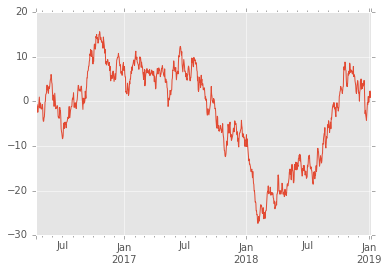

In [145]:
%matplotlib inline
ts.plot()

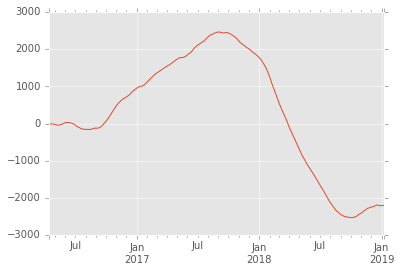

In [146]:
ts = ts.cumsum()
ts.plot()

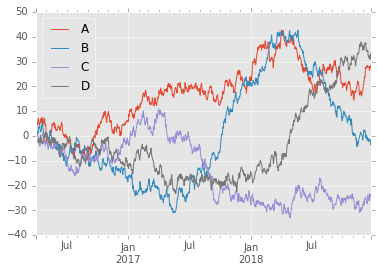

In [151]:
#plot通过标签很容易绘出所有字段
df = pd.DataFrame(np.random.randn(1000,4),
                  index=pd.date_range("20160401",periods=1000),
                 columns=["A","B","C","D"])

df = df.cumsum()
df.plot()

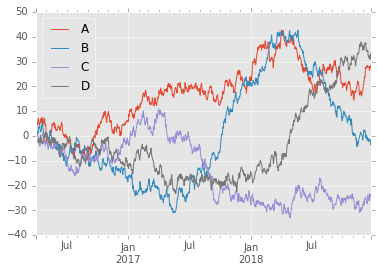

In [152]:
#plt.figure();df.plot();plt.legend(loc="best")

### 数据读入读出

In [153]:
#将数据以csv格式写入到csv文件里
df.to_csv("foo.csv")

In [154]:
#读入csv文件
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2016-04-01,1.554704,-0.201846,1.003132,-1.788251
1,2016-04-02,3.011026,0.758091,1.164068,-1.260183
2,2016-04-03,4.329196,-0.024705,0.343177,-2.216180
3,2016-04-04,4.684878,2.017070,0.545985,-2.257763
4,2016-04-05,4.826087,1.651106,0.495529,-2.246019
5,2016-04-06,6.002997,0.978382,-0.929421,-2.224742
6,2016-04-07,7.111712,2.546024,-1.657050,-2.188741
7,2016-04-08,6.311640,3.665048,-1.306682,-0.746576
8,2016-04-09,4.704858,3.412176,-2.685521,-2.742585
9,2016-04-10,4.662842,3.213633,-3.338678,-2.161218


In [155]:
#以hd5格式保存
df.to_hdf("foo.h5","df")

In [156]:
pd.read_hdf("foo.h5","df")

,A,B,C,D
2016-04-01,1.554704,-0.201846,1.003132,-1.788251
2016-04-02,3.011026,0.758091,1.164068,-1.260183
2016-04-03,4.329196,-0.024705,0.343177,-2.216180
2016-04-04,4.684878,2.017070,0.545985,-2.257763
2016-04-05,4.826087,1.651106,0.495529,-2.246019
2016-04-06,6.002997,0.978382,-0.929421,-2.224742
2016-04-07,7.111712,2.546024,-1.657050,-2.188741
2016-04-08,6.311640,3.665048,-1.306682,-0.746576
2016-04-09,4.704858,3.412176,-2.685521,-2.742585
2016-04-10,4.662842,3.213633,-3.338678,-2.161218


In [157]:
#保存为excel文件
df.to_excel("foo.xlsx",sheet_name="Sheet1")

In [158]:
pd.read_excel("foo.xlsx","Sheet1",index_col=None,na_values=["NA"])

,A,B,C,D
2016-04-01,1.554704,-0.201846,1.003132,-1.788251
2016-04-02,3.011026,0.758091,1.164068,-1.260183
2016-04-03,4.329196,-0.024705,0.343177,-2.216180
2016-04-04,4.684878,2.017070,0.545985,-2.257763
2016-04-05,4.826087,1.651106,0.495529,-2.246019
2016-04-06,6.002997,0.978382,-0.929421,-2.224742
2016-04-07,7.111712,2.546024,-1.657050,-2.188741
2016-04-08,6.311640,3.665048,-1.306682,-0.746576
2016-04-09,4.704858,3.412176,-2.685521,-2.742585
2016-04-10,4.662842,3.213633,-3.338678,-2.161218
